# <img style="float: left; padding-right: 0.7cm; width: 3.0cm" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/179px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Profesora:** Paula Aguirre <br>

----

 <h1><center>Tarea 4: Algoritmos de Aprendizaje Supervisado. </center></h1>
    
## Instrucciones Generales.

- Fecha de entrega: 1 de diciembre de 2021, 23:59.

- Vía de entrega: GitHub

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Se sugiere hacer consultas y comentarios sobre la Tarea a traves del Foro del curso en Canvas.


## Objetivos de Aprendizaje

Esta Tarea tiene como objetivo poner en práctica los contenidos del curso relativos a algoritmos de aprendizaje supervisado y no supervisado, en particular:
- Algortimos de regresión.
- Algoritmos de clustering.

---------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Displays the plots for us.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Regresión Lineal y Regresion con Regularización.

En los ejemplos desarrollados en clase, vimos como utilizar regresiones Lasso y Ridge, y cómo ajustar el parámetro $\alpha$ para evitar sobreajuste en el caso de regresiones polinomiales. En esta tarea, ud. aplicará estos conocimientos al caso de una regresión multilineal.

En este problema, analizaremos la expectativa de vida en un conjunto de países a partir de variables sociales, económicas y de salud como población, fertilidad, tasa de prevalencia de VIH, emisiones de CO2, índice de masa corporal (IMC) de hombres y mujeres, mortalidad infantil, y producto interno bruto del país (PIB). Estos datos están contenidos en el archivo `dat_prob1_t4.csv`.

El objetivo, es generar el "mejor" modelo de regresión que permita predecir la expectativa de vida (`expec_vida`) a partir de las demás variables, o de un subconjunto de ellas. Para ello, ud. deberá evaluar modelos de regresión lineal con y sin regularización, y seleccionar la combinación de parámetros y variables predictoras que entregue la mejor predicción, desarrollando los siguientes puntos:

**1.1.** Entrene un modelo de regresión lineal para predecir la variable `expec_vida` a partir de las demás variables predictoras. <br> 



In [114]:
df=pd.read_csv('dat_prob1_T4.csv')
df.head()

,poblacion,fertilidad,VIH,CO2,IMC_masc,PIB,IMC_fem,expec_vida,mort_infantil,region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [140]:
from sklearn.linear_model import LinearRegression

y=df['expec_vida']
X=df.drop(['expec_vida','region'],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [141]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [142]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

print('Coeficientes:',lin_reg.coef_)

Coeficientes: [-0.26100509 -0.51712008 -3.23019378 -0.71067343  1.09301345  2.19915648
 -1.13838076 -3.98465002]


**1.2.** Calcule las métricas de rendimiento del estimador sobre los datos de prueba. <br>

- Se puede usar MSE y/o R2.

In [143]:
from sklearn.metrics import mean_squared_error

y_predict_train=lin_reg.predict(X_train)
mse_train=mean_squared_error(y_train, y_predict_train)
r2_train=lin_reg.score(X_train, y_train)

y_predict_test=lin_reg.predict(X_test)
mse_test=mean_squared_error(y_test, y_predict_test)
r2_test=lin_reg.score(X_test, y_test)

print('MSE train:%.4f'%mse_train)
print('MSE test:%.4f'%mse_test)


print('R2 train:%.4f'%r2_train)
print('R2 test:%.4f'%r2_test)

MSE train:8.2825
MSE test:10.5469
R2 train:0.9076
R2 test:0.8380


**1.3.** Grafique los coeficientes de la regresión, analice y comente sus valores.<br>

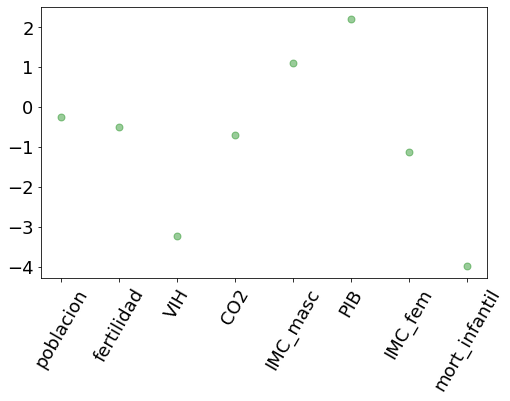

In [144]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)

ax.plot(lin_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns,rotation=60);
#ax.set_yscale('log')

**1.4.** Comente respecto a los resultados de su primer modelo: ¿es un modelo óptimo, o hay evidencias de subajuste o sobreajuste? Justifique su respuesta.

El modelo puede considerarse adecuado, ya que no hya coeficientes con valores extremos, el rendimiento es bueno para los datos de entrenamiento (por lo tanto, no hay subajuste), y un poco más bajo para los datos de prueba (por lo tanto, no hay señal de sobreajuste).
Hay variables con coeficientes cercanos a 0 que podrían excluirse del modelo para reducir la complejidad y riesgo de sobreajuste.

**1.5.** Entrene un modelo de regresión lineal con regularización tipo Ridge, y determine el valor óptimo para el parámetro $\alpha$. Valide y justifique su elección. 


In [145]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#definimos el modelo y grid search
ridge=Ridge()

alphas = np.logspace(-4, 2, 100)
grid_ridge = GridSearchCV(estimator=ridge,param_grid=dict(alpha=alphas),cv=10,scoring='r2')
grid_ridge.fit(X_train, y_train)

best_alpha_ridge=grid_ridge.best_estimator_.alpha
print(grid_ridge)
# summarize the results of the grid search
print('Best score:',grid_ridge.best_score_)
print('Best alpha:',grid_ridge.best_estimator_.alpha)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923e-04, 6.13590727e-04, 7.05480231e-04, 8.11130831e-04,
       9.32603347e-04, 1.07226722e-03, 1.23284674e-03, 1...
       4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00,
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02])},
             scoring='r2')
Best score: 0.8662924761321215
Best alpha: 2.009233002565046


**1.6.** Una vez seleccionado el valor de $\alpha$, reentrene el modelo Ridge y calcule sus métricas de rendimiento sobre el dataset de prueba.<br>

In [147]:
alpha=best_alpha_ridge

ridge_reg=Ridge(alpha=best_alpha_ridge)
ridge_reg.fit(X_train, y_train)

y_predict_train=ridge_reg.predict(X_train)
mse_train=mean_squared_error(y_train, y_predict_train)
r2_train=ridge_reg.score(X_train, y_train)

y_predict_test=ridge_reg.predict(X_test)
mse_test=mean_squared_error(y_test, y_predict_test)
r2_test=ridge_reg.score(X_test, y_test)

print('MSE train:%.4f'%mse_train)
print('MSE test:%.4f'%mse_test)


print('R2 train:%.4f'%r2_train)
print('R2 test:%.4f'%r2_test)

print('Coeficientes:',ridge_reg.coef_)

MSE train:8.3063
MSE test:10.4678
R2 train:0.9074
R2 test:0.8393
Coeficientes: [-0.27497394 -0.73424567 -3.20305693 -0.63727466  1.13090892  2.121279
 -1.18605611 -3.68171608]


**1.7.** Grafique los coeficientes de la regresión Ridge final, analice y comente sus valores. ¿Cómo se comparan con los resultados del punto **1.3**? <br>


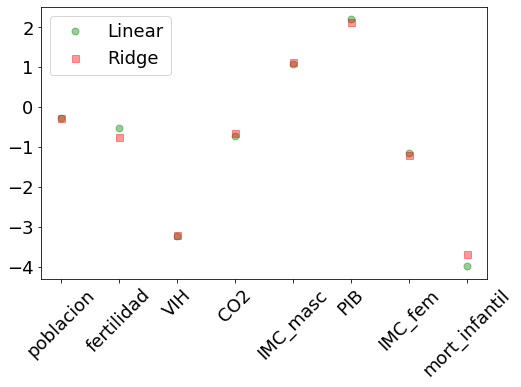

In [148]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)

ax.plot(lin_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear')
ax.plot(ridge_reg.coef_,alpha=0.4,linestyle='none',marker='s',markersize=7,color='r',label='Ridge')

ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns,rotation=45);
ax.legend();
#ax.set_yscale('log')

**1.8.** Repita los puntos **1.5, 1.6 y 1.7** utilizando ahora un estimador tipo **Lasso**.<br>

In [157]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#definimos el modelo y grid search
lasso=Lasso(normalize=False)

alphas = np.logspace(-4, 2, 100)
grid_lasso = GridSearchCV(estimator=lasso,param_grid=dict(alpha=alphas),cv=10,scoring='r2')
grid_lasso.fit(X_train, y_train)

print(grid_ridge)
# summarize the results of the grid search

best_alpha_lasso=grid_lasso.best_estimator_.alpha
print('Best score (Lasso):',grid_lasso.best_score_)
print('Best alpha (Lasso):',grid_lasso.best_estimator_.alpha)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923e-04, 6.13590727e-04, 7.05480231e-04, 8.11130831e-04,
       9.32603347e-04, 1.07226722e-03, 1.23284674e-03, 1...
       4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00,
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02])},
             scoring='r2')
Best score (Lasso): 0.86573707655931
Best alpha (Lasso): 0.005231099308056258


In [159]:
from sklearn.linear_model import Lasso

alpha=best_alpha_lasso
lasso_reg=Lasso(alpha=best_alpha_lasso,normalize=False)
lasso_reg.fit(X_train, y_train)

y_predict_train=lasso_reg.predict(X_train)
mse_train=mean_squared_error(y_train, y_predict_train)
r2_train=lasso_reg.score(X_train, y_train)

y_predict_test=lasso_reg.predict(X_test)
mse_test=mean_squared_error(y_test, y_predict_test)
r2_test=lasso_reg.score(X_test, y_test)

print('MSE train:%.4f'%mse_train)
print('MSE test:%.4f'%mse_test)


print('R2 train:%.4f'%r2_train)
print('R2 test:%.4f'%r2_test)

print('Coeficientes:',lasso_reg.coef_)

MSE train:8.2827
MSE test:10.5502
R2 train:0.9076
R2 test:0.8380
Coeficientes: [-0.25634009 -0.50991048 -3.2266886  -0.6921751   1.08768318  2.18769362
 -1.13708581 -3.98942527]


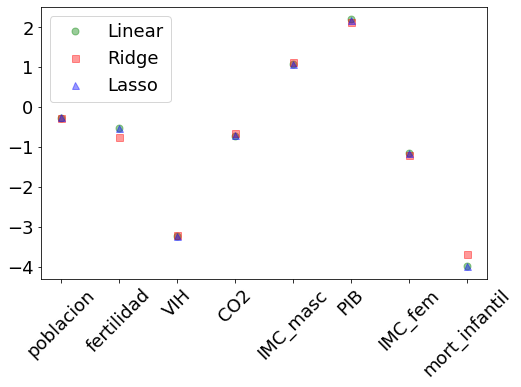

In [155]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)

ax.plot(lin_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear')
ax.plot(ridge_reg.coef_,alpha=0.4,linestyle='none',marker='s',markersize=7,color='r',label='Ridge')
ax.plot(lasso_reg.coef_,alpha=0.4,linestyle='none',marker='^',markersize=7,color='b',label='Lasso')

ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns,rotation=45);
ax.legend();
#ax.set_yscale('log')

**1.9.** Compare el rendimiento de sus tres modelos (lineal, mejor Ridge, mejor Lasso) y comente: ¿cuál modelo es más recomendable para predecir la expectativa de vida de los países del mundo? ¿Cuáles variables (del dataset) deberían ser consideradas en un modelo de predicción de expectativa de vida?

Resumen:

|Modelo | Alpha|R$^2$ (train) |  R$^2$ (test)| MSE (train)| MSE (test)|
|:----  |:---- |:----       |:----       |:----       |:----|
|Lineal  |   -    |0.9076|0.8380|8.2825|10.5469|
|Ridge  |   2.01    |0.9074|0.8393|8.3063|10.4678|
|Lasso  |   0.0049    |0.9076|0.8380|8.2827|10.5500|

Los resultados son similares para los tres tipos de regresión, con un rendimiento muylevemnte mejor para el modelo Ridge (menor error de validación).
En los tres casos, las variables prevalentes son `VIH`,`IMC_masc`,`PIB`,`mortalidad_infantil`. Las variables `poblacion`,`fertilidad`,`CO2` tienen coeficientes cercanos a 0, y podrían excluirse del modelo. De hecho al aumentar el parámetro $\alpha$ en Lasso (i.e. mayor penalización, por ejemplo $\alpha=1$), los coeficientes de estas variables se hacen 0.


## 2. Clustering.

En este ejercicio, ud. aplicará métodos de clustering para explorar las características de la población de área metropolitana, y extraer información acerca de la estructura socioeconómica del Gran Santiago. Para ello, se identificarán patrones comunes en base a un conjunto de datos multidimensional generada a partir de los Censos de 2012 y 2017.

La base de datos utilizada para este ejercicio ha sido pre-procesada y combina los datos demográficos del Censo 2017 (www.ine.cl) , con indicadores socioeconómicos construidos para las manzanas del área metropolitana de Santiago a partir del Censo 2012 (ya que el Censo 2017 fue abreviado y no contiene tanta información como el anterior). Estos indicadores están disponibles en la IDE del Observatorio de Ciudades UC:

https://ideocuc-ocuc.hub.arcgis.com/datasets/c264bc8bca7f45bc8ae74329557628b2_0

Los datos ya han sido pre-procesados para homologar la cartografía del 2012 al 2017, y están resumidos en el archivo: `C2017-2012_RM_pob_socioec.gpkg`. Los campos contenidos en este archivo son los siguientes:

|Campo | Descripción|
|:----  |:----    |
|densidad  |   Densidad de población por manzana censal (habitantes/m$^2$)     |
 |   pct_adultoMayor|  Porcentaje de adultos mayores |
 |   pct_inmigrante |  Pocentaje de población inmigrante|
 |   pct_originario |  Porcentaje de población perteneciente a pueblos originarios|
 |   pct_nna        |  Porcentaje de niños, niñas y adolescentes|
 |   pct_hombres    |  Porcentaje de hombres|
 |   pct_mujeres    |  Porcentaje de mujeres|
 |   pct_adultos    |  Porcentaje de poblaicón adulta|
 |   EDUC           |  Indicador de calidad educacional|
 |   Hacinpunt     |    Indicador de hacinamiento  |
 |  NSE           |  Indicados de nivel socioeconómico|
 |  geometry     |    Geometría de la manzana censal|
 
El objetivo es realizar un análisis geodemográfico del Gran Santiago, que corresponde a una forma de análisis multivariado de clustering donde las observaciones están asociadas a áreas geográficas, y el resultado del clustering puede ser visualizado en un mapa (pero no se impone ninguna restricción geográfica a la clasificación). 

Estos métodos utilizan algoritmos de clustering para construir un número determinado ($k$) de clusters típicamente mucho menor al número de observaciones a clasificar. Cada cluster tiene una única etiqueta, y estas etiquetas se pueden graficar o desplegar en un mapa. Usando la etiqueta y perfil de cada cluster, el mapa de etiquetas puede ser interpretado para obtener una visión de la distribución espacial de ciertas tendencias sociodemográficas. 

**2.1** Normalize los datos para eliminar efectos de escala.<br>



In [65]:
import geopandas as gpd
manz=gpd.read_file('C2017-2012_RM_pob_socioec.gpkg')
manz.head()

,densidad,pct_adultoMayor,pct_inmigrante,pct_originario,pct_nna,pct_hombres,pct_mujeres,pct_adultos,EDUC,Hacinpunt,NSE,geometry
0,0.054692,4.581152,35.994764,9.293194,19.633508,47.513089,52.486911,75.785340,12.296209,120,615.703002,"POLYGON ((344096.410 6300127.298, 344107.550 6..."
1,0.048181,7.957154,15.455241,6.350421,20.887529,46.595256,53.404744,71.155318,12.212580,120,565.386146,"POLYGON ((344409.506 6299902.537, 344265.614 6..."
2,0.010379,6.250000,29.687500,0.000000,21.875000,50.000000,50.000000,71.875000,10.868421,120,538.684211,"POLYGON ((343989.345 6300001.313, 343988.286 6..."
3,0.003985,0.000000,46.153846,11.538462,11.538462,48.076923,51.923077,69.230769,11.500000,120,533.823529,"POLYGON ((343776.213 6299893.815, 343773.421 6..."
4,0.008718,13.432836,37.313433,0.000000,0.000000,52.238806,47.761194,73.134328,9.692308,120,459.769231,"POLYGON ((343998.500 6299870.782, 343948.879 6..."


In [70]:
cl_var=['densidad','pct_adultoMayor','pct_inmigrante','pct_originario','pct_nna','pct_hombres','pct_mujeres','EDUC','Hacinpunt','NSE']

scaler=StandardScaler()
manz_sc=scaler.fit_transform(manz[cl_var])
manz_sc


array([[ 2.62755543, -0.85066647,  3.4884121 , ...,  0.92240589,
        -0.19439716,  0.77193235],
       [ 2.13041708, -0.45537733,  1.20574721, ...,  0.88918019,
        -0.19439716,  0.41565012],
       [-0.75603497, -0.65526446,  2.78745275, ...,  0.35514714,
        -0.19439716,  0.22657977],
       ...,
       [-0.07849973, -0.55072165,  3.45724103, ..., -3.96286723,
        -3.62881875, -3.58772092],
       [ 2.02956951, -0.17056597, -0.51187473, ..., -0.81838986,
        -0.19439716, -0.75543439],
       [-0.72039556, -0.41133123, -0.51187473, ..., -0.30353302,
        -0.19439716, -0.66410696]])

### 2.2 Genere una clusterización con un número arbitrario de clusters ( 𝑘 ), y grafique sus resultados en forma de mapa. Para ello, utilice como columna a graficar la etiqueta de cluster asignada a cada manzana censal.


In [82]:
from sklearn.cluster import KMeans

nclusters=3 #número predefinido de clusters

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=nclusters)

# Fijar semilla random para reproducibilidad
np.random.seed(1234)

# Correr el algoritmo sobre el conjunto de variable normalizadas
kcls = kmeans.fit(manz_sc) 

# Asignar etiquetas de cluster a una nueva columna del dataframe
manz['k%d_labels'%nclusters] = kcls.labels_

#centroides de clusters
centers=kcls.cluster_centers_
print(centers.shape)

(3, 10)


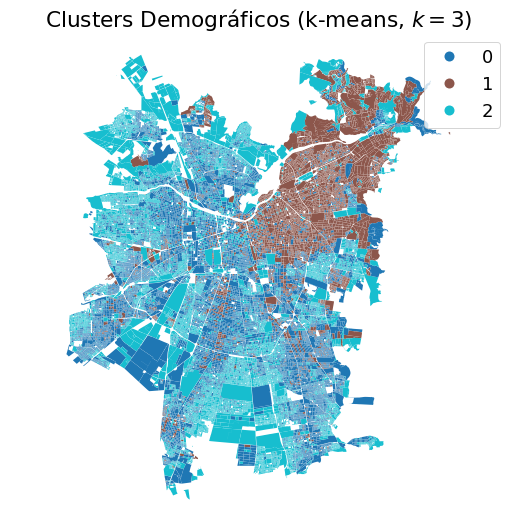

In [83]:

#Mapa de etiquetas
f, ax = plt.subplots(1, figsize=(9, 9))
manz.plot(column='k%d_labels'%nclusters, categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title(r'Clusters Demográficos (k-means, $k=%d$)'%nclusters)
plt.show()

### 2.3 Repita ahora su clusterización para varios valores de  𝑘 , y utilice el método del codo para determinar el número recomendable de clusters.


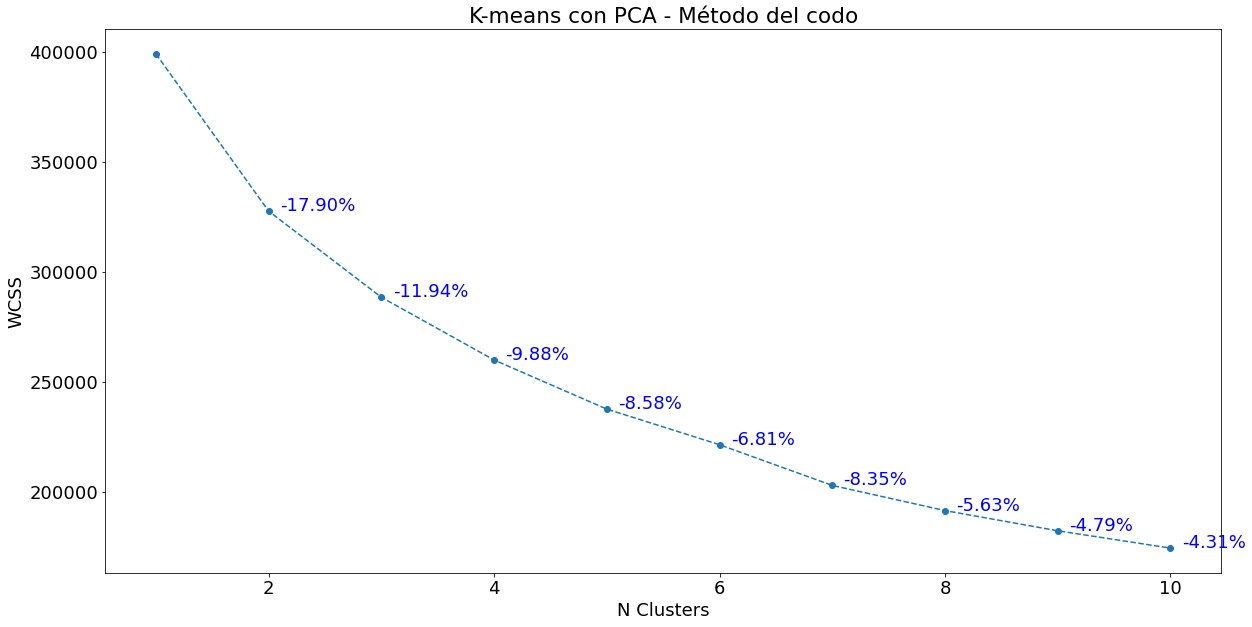

In [79]:
wcss=[]

for i in range(1,11):

    kmeans_pca = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans_pca.fit(manz_sc)
    
    wcss.append(kncl.inertia_)
    
#Grafico
f, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot(range(1,11),wcss,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('WCSS')
ax.set_title('K-means con PCA - Método del codo')

for i in range(1,len(wcss)):
    delta=(-wcss[i-1]+wcss[i])/wcss[i-1]*100
    ax.text(i+1.1,wcss[i],'%.2f'%delta+'%',color='b')
plt.show()

### 2.4 Con el valor de  𝑘  seleccionado, realice la clusterización final y grafique sus resultados.

Pueden seleccionar k=4 o k=5, tiene que estar la argumentación (no sólo el gráfico).

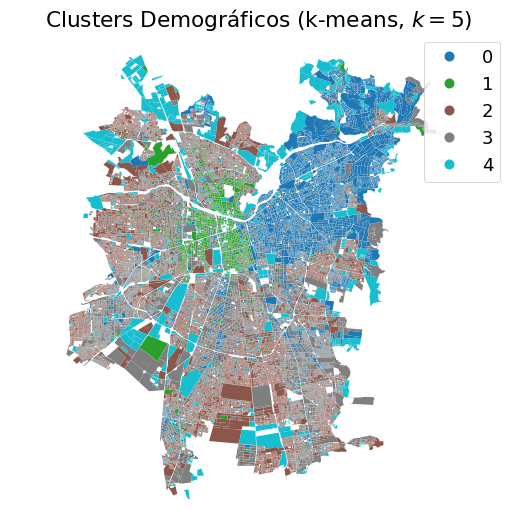

In [84]:
nclusters=5 #número predefinido de clusters

kmeans = KMeans(n_clusters=nclusters)

# Fijar semilla random para reproducibilidad
np.random.seed(1234)

# Correr el algoritmo sobre el conjunto de variable normalizadas
kcls = kmeans.fit(manz_sc) 

# Asignar etiquetas de cluster a una nueva columna del dataframe
manz['k%d_labels'%nclusters] = kcls.labels_


#Mapa de etiquetas
f, ax = plt.subplots(1, figsize=(9, 9))
manz.plot(column='k%d_labels'%nclusters, categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title(r'Clusters Demográficos (k-means, $k=%d$)'%nclusters)
plt.show()

### 2.5 Analice el perfil de los clusters generados. ¿Cómo puede resumir las principales características de cada grupo sociodemográfico, y es coherente esta caracterización con su apreciación de la distribución sociodemográfica del Gran Santiago?

In [88]:
# Group table by cluster label, keep the variables used 
# for clustering, and obtain their mean
kmeans = manz.groupby('k5_labels').mean()[cl_var]
kmeans.T

k5_labels,0,1,2,3,4
densidad,0.012292,0.024361,0.027214,0.014937,0.012983
pct_adultoMayor,15.563309,8.348565,8.958828,14.747514,6.884645
pct_inmigrante,5.855982,34.273509,2.599664,2.545942,6.794965
pct_originario,4.269008,8.477423,14.150977,7.007776,7.294472
pct_nna,10.432532,12.876050,19.867348,9.417770,11.645116
pct_hombres,46.096504,51.765258,49.307079,47.485252,46.049142
pct_mujeres,53.434838,48.022540,50.623125,52.343982,45.758768
EDUC,13.176100,10.660555,8.907865,10.741227,0.017675
Hacinpunt,199.515720,121.549072,119.299715,120.009563,0.225989
NSE,734.961654,515.706656,444.367141,535.552704,0.841051


En general, las proporciones de género son similares para todos los clusters.

- Cluster 0: asociado mayoritariamente a sector oriente,  más alto NSE y nivel educacional, mayor porcentaje relativo de adultos mayores.
- Cluster 1: asociado a Santiago centro y lagunas zonas en el sur de Santiago, se caracteriza por alta presencia de inmigrantes, nivel de educación y hacinamiento intermedio, mayor densidad poblacional.
- Cluster 2: manzanas más periféricas, mayor proporción de pueblos originarios y NNA, más bajo nivel educacional y nivel socioeconómico.
- Cluster 3: parecido a cluster 2, pero con mayor porporción de adulstos mayores en vez de pueblos originarios. 
- Cluster 4: manzanas con datos incompletos, tiene valores de NSE, EDUC, NSE=0.

In [94]:
manz[manz['k5_labels']==4]

,densidad,pct_adultoMayor,pct_inmigrante,pct_originario,pct_nna,pct_hombres,pct_mujeres,pct_adultos,EDUC,Hacinpunt,NSE,geometry,k5cls,k3_labels,k5_labels
6,0.001405,0.000000,83.333333,0.000000,0.000000,55.555556,44.444444,0.000000,0.0,0,0.0,"POLYGON ((344187.172 6299882.296, 344134.352 6...",2,2,4
9,0.012458,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,85.714286,0.0,0,0.0,"POLYGON ((344704.191 6299899.114, 344672.003 6...",2,2,4
18,0.004112,0.000000,43.478261,0.000000,0.000000,56.521739,43.478261,0.000000,0.0,0,0.0,"POLYGON ((344262.803 6299786.642, 344204.272 6...",2,2,4
25,0.002058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.142857,0.0,0,0.0,"POLYGON ((345040.772 6299737.465, 345019.329 6...",2,2,4
34,0.003519,0.000000,33.333333,0.000000,0.000000,40.476190,59.523810,92.857143,0.0,0,0.0,"POLYGON ((343854.197 6299605.174, 343780.530 6...",2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39886,0.009899,11.023622,37.007874,7.874016,15.748031,55.905512,44.094488,73.228346,0.0,0,0.0,"MULTIPOLYGON (((343362.554 6293277.772, 343360...",2,2,4
39887,0.005444,15.183246,2.617801,8.900524,18.324607,52.356021,47.643979,66.492147,0.0,0,0.0,"MULTIPOLYGON (((342859.022 6292292.363, 342774...",2,2,4
39888,0.004121,10.937500,7.812500,3.906250,19.531250,46.093750,53.906250,69.531250,0.0,0,0.0,"MULTIPOLYGON (((343294.932 6291595.511, 343274...",2,2,4
39891,0.012653,17.333333,0.000000,6.666667,0.000000,42.666667,57.333333,68.000000,0.0,0,0.0,"MULTIPOLYGON (((344486.970 6293687.908, 344486...",2,2,4
